# RapidWright Tutorial - Hello, World!
In this Jupyter notebook tutorial, we illustrate how RapidWright can: 
 0. Run code in Jupyter Notebooks (what they are and why they are useful)
 1. Create a complete, placed and routed design from scratch
 2. Write out a design checkpoint (.dcp) file
 3. Create a bitstream ready for download using Vivado (if available)

## What is a Jupyter Notebook? 
Before we begin, let's briefly describe what is a 'Jupyter notebook' and how we will use it (feel free to skip this part if you are already familiar).  A Jupyter notebook is a web document that contains runnable code (Python, for example) and/or rich text elements (paragraph, pictures, video, ...).  Code blocks (or cells) in a notebook can be executed by the Jupyter notebook server and results of the code execution are delivered in the notebook.  Having the ability to run code in context of the document makes Jupyter notebooks a great way to demonstrate techniques and ideas (but we don't necessarily recommend them for heavy code development).  Please see [Jupyter Notebook Quick Start Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html) for more information.

Notebooks are made up of rectangular boxes called cells. Some cells contain code and can be executed, for example:

In [ ]:
# This is a Python code cell
print "Hello, World!"

To run the code in a cell, make sure it is selected by clicking on the cell with the mouse (it should have a blue or green outline) and then clicking on the "Run" button above in the toolbar. Alternatively, you can use the keyboard shortcut `CTRL+Enter` to run the cell.  The output or result of the cell will be shown just below the executed cell.  Go ahead and practice on the cell above.

When a cell is being executed on the server, you'll see the annotation brackets on the left side of the cell transition from `In [ ]:` -> `In [*]:` -> `In [1]:`.  

|Annotation|Meaning|
|----------|---|
| `In [ ]` | Cell has not been run |
| `In [*]` | Cell is currently running  |
| `In [1]` | Cell execution is complete (first cell run in this session)  |

Note that state from the execution of previously run cells will persist into the next code cell (imported packages, defined variables, ...).  This allows the tasks to be run in steps.  If you get into trouble you can always restart the kernel (the program on the server running all these cells) by choosing `Kernel->Restart` from the menu.  For more information, see [Jupyter Notebook documetation](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html#Overview-of-the-Notebook-UI).

## Background
For this tutorial, we target the [PYNQ-Z1](https://store.digilentinc.com/pynq-z1-python-productivity-for-zynq-7000-arm-fpga-soc/) board which has a Zynq-7000 device (xc7z020clg400-1).  Although we don't explicitly print "Hello World", this circuit instantiates just a single LUT to tie two buttons to an LED output as shown in the circuit diagram below:
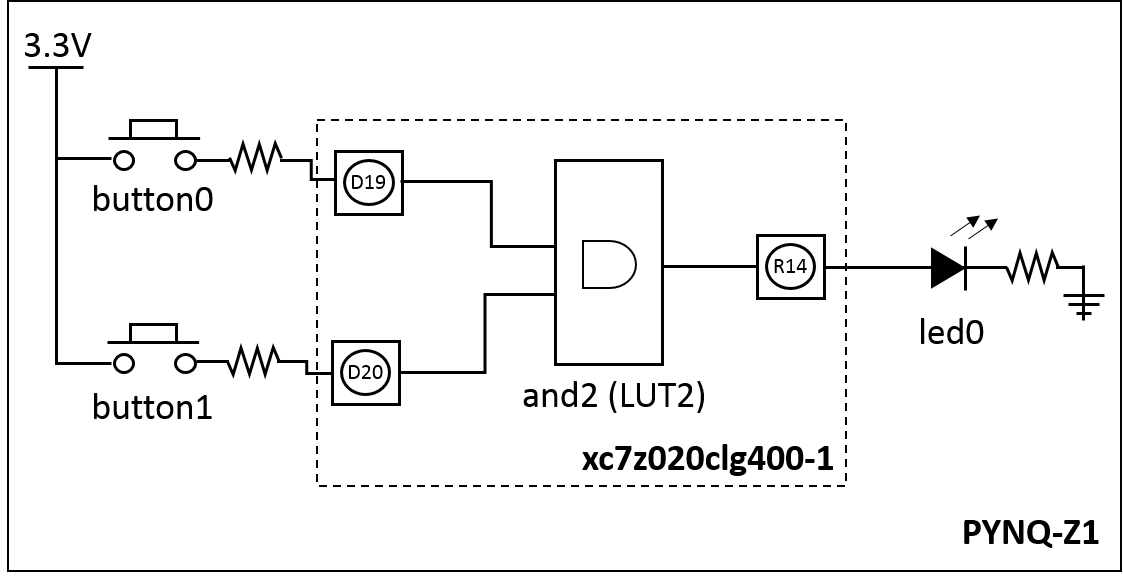

## Get Started!
To begin, examine the code cell below which includes the entire RapidWright code to create a placed and routed design from scratch of the circuit described above.  When ready, go ahead and select the code cell and run it ("Run" button or `CTRL+Enter`).

In [ ]:
# Import RapidWright classes
import os
from com.xilinx.rapidwright.design import Cell
from com.xilinx.rapidwright.design import Design
from com.xilinx.rapidwright.design import Net
from com.xilinx.rapidwright.design import PinType
from com.xilinx.rapidwright.design import Unisim
from com.xilinx.rapidwright.device import Device
from com.xilinx.rapidwright.router import Router
from com.xilinx.rapidwright.util   import FileTools

# Create a new empty design
design = Design("HelloWorld",Device.PYNQ_Z1)

# Create cells and place them
lut     = design.createAndPlaceCell("lut", Unisim.AND2, "SLICE_X100Y100/A6LUT")
button0 = design.createAndPlaceIOB("button0", PinType.IN,  "D19", "LVCMOS33")
button1 = design.createAndPlaceIOB("button1", PinType.IN,  "D20", "LVCMOS33")
led0    = design.createAndPlaceIOB("led0",    PinType.OUT, "R14", "LVCMOS33")

# Wire up the AND gate to buttons and LEDs
net0 = design.createNet("button0_IBUF")
net0.connect(button0, "O")
net0.connect(lut, "I0")

net1 = design.createNet("button1_IBUF")
net1.connect(button1, "O")
net1.connect(lut, "I1")

net2 = design.createNet("lut")
net2.connect(lut, "O")
net2.connect(led0, "I")

# Route intra-site connections
design.routeSites()

# Route inter-site connections
Router(design).routeDesign()

# Write out the placed and routed DCP
design.writeCheckpoint("HelloWorld-PYNQ_Z1.dcp")

# Print out where the DCP file was written
print "Wrote DCP '" + os.path.join(os.getcwd(), "HelloWorld-PYNQ_Z1.dcp") + "' successfully"

If the code executed successfully, you should see the standard output from the cell saying:

`Wrote design 'HelloWorld' successfully.`

Note that no Verilog/VHDL was used to create this design.  All elements of the design were directly instantiated and placed in RapidWright.  Routing was also accomplished in the RapidWright environment.  When the design was complete, we simply wrote out a design checkpoint (DCP) using the `Design.writeCheckpoint()` API.  

This DCP can be seen in the [Jupyter Notebook Dashboard](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html), accessible by clicking on the Jupyter logo in the top left of the page.  The recently created file will be listed and a download button (among others) will appear if the  checkbox next to the file name is selected:

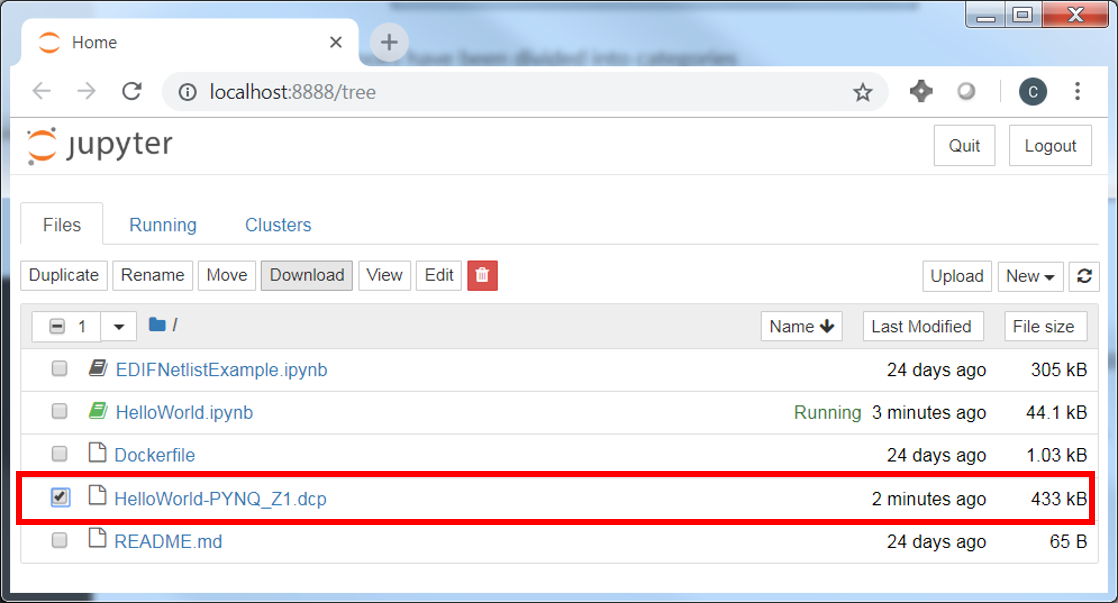

Now we can examine the results of our DCP by loading it in Vivado.  If the Jupyter notebook server is running locally, you can run the code cell below to open vivado with the newly made DCP:

In [ ]:
# open up an instance of Vivado and load our freshly created DCP...
if FileTools.isWindows():
    os.system("START /B vivado HelloWorld-PYNQ_Z1.dcp")
else:
    os.system("vivado HelloWorld-PYNQ_Z1.dcp &")
print "If vivado fails to open or load, you could run the following command:"
print ""
print "    'vivado " + os.path.join(os.getcwd(), "HelloWorld-PYNQ_Z1.dcp") + "'"

Once Vivado has opened the DCP, the netlist and device views can be explored as shown in the screenshot below:

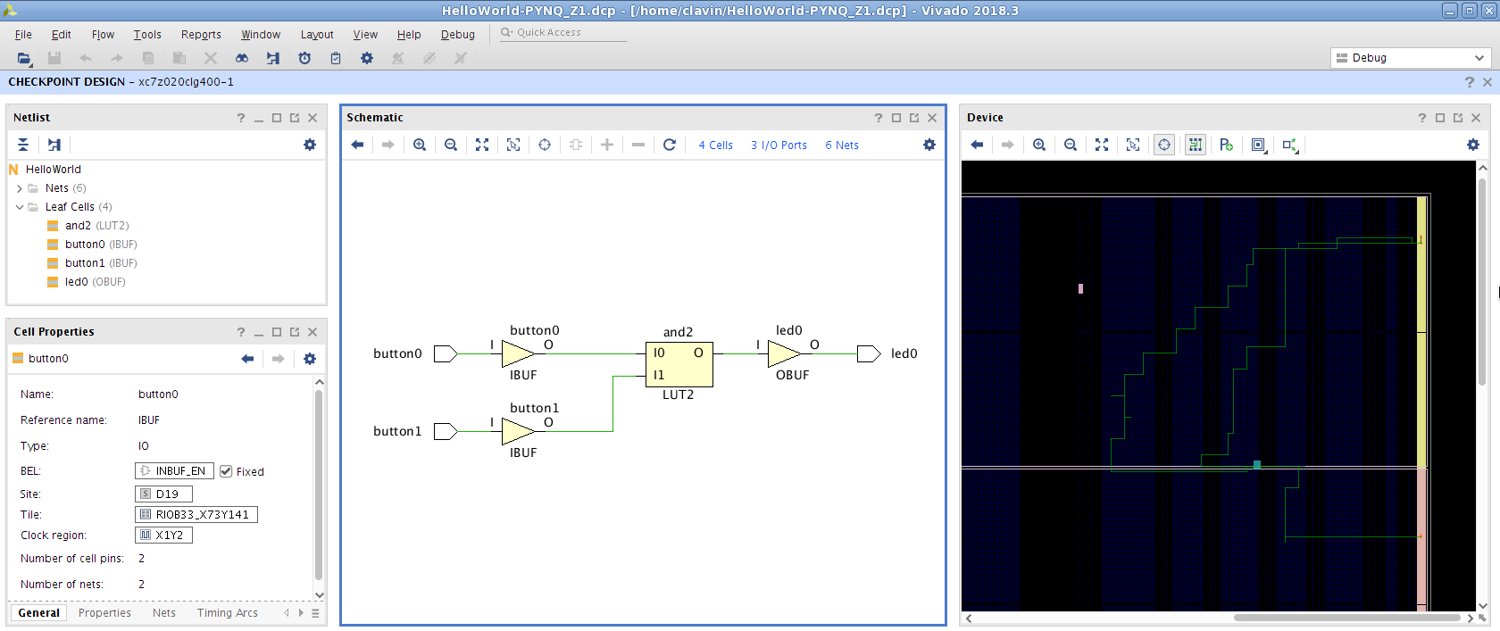

If you happen to have access to a PYNQ-Z1 board, you can write a bitstream with the `write_bitstream` command and download it accordingly.  

## Some Quick Exercises

1. Try changing the functionality of the LUT programming to something other than AND, such as OR or XOR.  
> ***HINT:***
> Once you have an object loaded (run the code block once), you can use `TAB` to tab-complete options on objects to list  their members (variables and/or methods).


2. Try adding another button to the input of the LUT.
> ***HINT:***
> The package pin for Button2 on the PYNQ-Z1 is `L20` (see [PYNQ-Z1 Reference Guide, page 15](https://reference.digilentinc.com/_media/reference/programmable-logic/pynq-z1/pynq-rm.pdf)).
